In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# ✅ Step 1: 挂载 Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Step 2: 导入库
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import os
import shutil

# ✅ Step 3: 设置参数
BATCH_SIZE = 64
EPOCHS = 50
PATIENCE = 5
LR = 1e-4
NUM_CLASSES = 7
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Step 4: 数据路径（你自己的路径）
train_path = '/content/drive/MyDrive/dataset/train'
test_path = '/content/drive/MyDrive/dataset/test'

# ✅ Step 5: 数据预处理
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ✅ Step 6: 加载 MobileNetV2 并修改最后一层
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)
model.classifier[1] = nn.Linear(model.last_channel, NUM_CLASSES)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# ✅ Step 7: EarlyStopping 设置
best_loss = float('inf')
patience_counter = 0

# ✅ Step 8: 训练主循环
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    all_preds, all_labels = [], []

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        acc = accuracy_score(all_labels, all_preds)
        loop.set_postfix(loss=loss.item(), acc=acc)

    train_acc = accuracy_score(all_labels, all_preds)
    print(f"✅ Epoch {epoch+1}: Loss={epoch_loss:.4f}, Train Acc={train_acc:.4f}")

    # 保存最优模型
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'mobilenetv2_best.pth')
        shutil.copy('mobilenetv2_best.pth', '/content/drive/MyDrive/mobilenetv2_best.pth')
        print("✅ Best model saved to Drive.")
    else:
        patience_counter += 1
        print(f"⚠️ EarlyStopping counter: {patience_counter}/{PATIENCE}")
        if patience_counter >= PATIENCE:
            print("⛔ Early stopping triggered.")
            break


Mounted at /content/drive


Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 56.5MB/s]
Epoch 1/50: 100%|██████████| 452/452 [2:15:29<00:00, 17.99s/it, acc=0.472, loss=1.34]


✅ Epoch 1: Loss=618.0856, Train Acc=0.4721
✅ Best model saved to Drive.


Epoch 2/50: 100%|██████████| 452/452 [03:48<00:00,  1.98it/s, acc=0.624, loss=0.93]


✅ Epoch 2: Loss=455.4732, Train Acc=0.6243
✅ Best model saved to Drive.


Epoch 3/50: 100%|██████████| 452/452 [03:50<00:00,  1.96it/s, acc=0.705, loss=0.868]


✅ Epoch 3: Loss=362.2982, Train Acc=0.7050
✅ Best model saved to Drive.


Epoch 4/50: 100%|██████████| 452/452 [03:51<00:00,  1.95it/s, acc=0.788, loss=0.497]


✅ Epoch 4: Loss=266.8841, Train Acc=0.7884
✅ Best model saved to Drive.


Epoch 5/50: 100%|██████████| 452/452 [03:52<00:00,  1.95it/s, acc=0.871, loss=0.179]


✅ Epoch 5: Loss=172.7407, Train Acc=0.8708
✅ Best model saved to Drive.


Epoch 6/50: 100%|██████████| 452/452 [03:53<00:00,  1.93it/s, acc=0.934, loss=0.181]


✅ Epoch 6: Loss=97.7616, Train Acc=0.9337
✅ Best model saved to Drive.


Epoch 7/50: 100%|██████████| 452/452 [03:53<00:00,  1.93it/s, acc=0.965, loss=0.126]


✅ Epoch 7: Loss=54.6864, Train Acc=0.9653
✅ Best model saved to Drive.


Epoch 8/50: 100%|██████████| 452/452 [03:53<00:00,  1.93it/s, acc=0.976, loss=0.195]


✅ Epoch 8: Loss=39.2580, Train Acc=0.9762
✅ Best model saved to Drive.


Epoch 9/50: 100%|██████████| 452/452 [03:54<00:00,  1.93it/s, acc=0.981, loss=0.0609]


✅ Epoch 9: Loss=29.8969, Train Acc=0.9813
✅ Best model saved to Drive.


Epoch 10/50: 100%|██████████| 452/452 [03:54<00:00,  1.92it/s, acc=0.98, loss=0.0644]


✅ Epoch 10: Loss=30.4385, Train Acc=0.9798
⚠️ EarlyStopping counter: 1/5


Epoch 11/50: 100%|██████████| 452/452 [03:54<00:00,  1.93it/s, acc=0.983, loss=0.0845]


✅ Epoch 11: Loss=27.1592, Train Acc=0.9827
✅ Best model saved to Drive.


Epoch 12/50: 100%|██████████| 452/452 [03:56<00:00,  1.91it/s, acc=0.983, loss=0.0262]


✅ Epoch 12: Loss=24.0863, Train Acc=0.9833
✅ Best model saved to Drive.


Epoch 13/50: 100%|██████████| 452/452 [03:54<00:00,  1.92it/s, acc=0.982, loss=0.0314]


✅ Epoch 13: Loss=25.3351, Train Acc=0.9823
⚠️ EarlyStopping counter: 1/5


Epoch 14/50: 100%|██████████| 452/452 [03:57<00:00,  1.91it/s, acc=0.986, loss=0.0281]


✅ Epoch 14: Loss=20.1543, Train Acc=0.9863
✅ Best model saved to Drive.


Epoch 15/50: 100%|██████████| 452/452 [03:56<00:00,  1.91it/s, acc=0.984, loss=0.00839]


✅ Epoch 15: Loss=22.0128, Train Acc=0.9838
⚠️ EarlyStopping counter: 1/5


Epoch 16/50: 100%|██████████| 452/452 [03:56<00:00,  1.91it/s, acc=0.986, loss=0.0807]


✅ Epoch 16: Loss=19.2542, Train Acc=0.9863
✅ Best model saved to Drive.


Epoch 17/50: 100%|██████████| 452/452 [03:56<00:00,  1.91it/s, acc=0.984, loss=0.0551]


✅ Epoch 17: Loss=21.4252, Train Acc=0.9838
⚠️ EarlyStopping counter: 1/5


Epoch 18/50: 100%|██████████| 452/452 [03:56<00:00,  1.91it/s, acc=0.983, loss=0.0086]


✅ Epoch 18: Loss=23.3531, Train Acc=0.9827
⚠️ EarlyStopping counter: 2/5


Epoch 19/50: 100%|██████████| 452/452 [03:57<00:00,  1.91it/s, acc=0.989, loss=0.00985]


✅ Epoch 19: Loss=15.8118, Train Acc=0.9887
✅ Best model saved to Drive.


Epoch 20/50: 100%|██████████| 452/452 [03:56<00:00,  1.91it/s, acc=0.989, loss=0.052]


✅ Epoch 20: Loss=15.2372, Train Acc=0.9893
✅ Best model saved to Drive.


Epoch 21/50: 100%|██████████| 452/452 [03:54<00:00,  1.93it/s, acc=0.986, loss=0.0425]


✅ Epoch 21: Loss=18.2377, Train Acc=0.9862
⚠️ EarlyStopping counter: 1/5


Epoch 22/50: 100%|██████████| 452/452 [03:54<00:00,  1.93it/s, acc=0.986, loss=0.0935]


✅ Epoch 22: Loss=18.4328, Train Acc=0.9857
⚠️ EarlyStopping counter: 2/5


Epoch 23/50: 100%|██████████| 452/452 [03:53<00:00,  1.94it/s, acc=0.989, loss=0.127]


✅ Epoch 23: Loss=15.5642, Train Acc=0.9889
⚠️ EarlyStopping counter: 3/5


Epoch 24/50: 100%|██████████| 452/452 [03:54<00:00,  1.92it/s, acc=0.989, loss=0.0044]


✅ Epoch 24: Loss=14.2433, Train Acc=0.9895
✅ Best model saved to Drive.


Epoch 25/50: 100%|██████████| 452/452 [03:54<00:00,  1.93it/s, acc=0.987, loss=0.00254]


✅ Epoch 25: Loss=17.0044, Train Acc=0.9873
⚠️ EarlyStopping counter: 1/5


Epoch 26/50: 100%|██████████| 452/452 [03:53<00:00,  1.94it/s, acc=0.989, loss=0.00941]


✅ Epoch 26: Loss=14.3773, Train Acc=0.9891
⚠️ EarlyStopping counter: 2/5


Epoch 27/50: 100%|██████████| 452/452 [03:53<00:00,  1.94it/s, acc=0.987, loss=0.0353]


✅ Epoch 27: Loss=16.3341, Train Acc=0.9872
⚠️ EarlyStopping counter: 3/5


Epoch 28/50: 100%|██████████| 452/452 [03:54<00:00,  1.92it/s, acc=0.988, loss=0.00683]


✅ Epoch 28: Loss=15.4228, Train Acc=0.9881
⚠️ EarlyStopping counter: 4/5


Epoch 29/50: 100%|██████████| 452/452 [03:53<00:00,  1.93it/s, acc=0.991, loss=0.00394]


✅ Epoch 29: Loss=11.6024, Train Acc=0.9905
✅ Best model saved to Drive.


Epoch 30/50: 100%|██████████| 452/452 [03:53<00:00,  1.93it/s, acc=0.99, loss=0.0381]


✅ Epoch 30: Loss=12.8584, Train Acc=0.9899
⚠️ EarlyStopping counter: 1/5


Epoch 31/50: 100%|██████████| 452/452 [03:53<00:00,  1.93it/s, acc=0.99, loss=0.069]


✅ Epoch 31: Loss=12.6478, Train Acc=0.9903
⚠️ EarlyStopping counter: 2/5


Epoch 32/50: 100%|██████████| 452/452 [03:54<00:00,  1.93it/s, acc=0.988, loss=0.0195]


✅ Epoch 32: Loss=15.3619, Train Acc=0.9876
⚠️ EarlyStopping counter: 3/5


Epoch 33/50: 100%|██████████| 452/452 [03:54<00:00,  1.93it/s, acc=0.989, loss=0.0152]


✅ Epoch 33: Loss=13.4760, Train Acc=0.9892
⚠️ EarlyStopping counter: 4/5


Epoch 34/50: 100%|██████████| 452/452 [03:54<00:00,  1.93it/s, acc=0.989, loss=0.0239]

✅ Epoch 34: Loss=14.3504, Train Acc=0.9887
⚠️ EarlyStopping counter: 5/5
⛔ Early stopping triggered.


Mounted at /content/drive

✅ Final Evaluation on Test Set:
Accuracy:  0.6284
Precision: 0.6297
Recall:    0.6284
F1 Score:  0.6271

📊 Classification Report:
              precision    recall  f1-score   support

       angry       0.51      0.58      0.54       958
     disgust       0.67      0.52      0.59       111
        fear       0.53      0.41      0.46      1024
       happy       0.84      0.83      0.83      1774
     neutral       0.53      0.61      0.57      1233
         sad       0.51      0.51      0.51      1247
    surprise       0.75      0.76      0.75       831

    accuracy                           0.63      7178
   macro avg       0.62      0.60      0.61      7178
weighted avg       0.63      0.63      0.63      7178



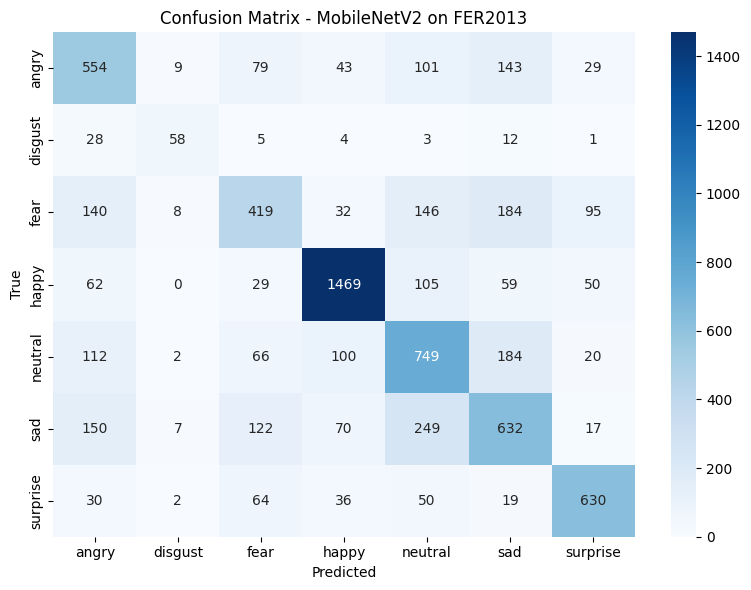

In [ ]:
# ✅ Step 1: 挂载 Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Step 2: 导入库
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Step 3: 设置参数
BATCH_SIZE = 64
NUM_CLASSES = 7
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Step 4: 加载测试集
test_path = '/content/drive/MyDrive/dataset/test'
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])
test_dataset = datasets.ImageFolder(test_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ✅ Step 5: 加载保存的最佳模型
model = models.mobilenet_v2(weights=None)
model.classifier[1] = nn.Linear(model.last_channel, NUM_CLASSES)
model.load_state_dict(torch.load('/content/drive/MyDrive/mobilenetv2_best.pth', map_location=device))
model = model.to(device)
model.eval()

# ✅ Step 6: 执行测试
true_labels, pred_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(1)
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())

# ✅ Step 7: 计算四个指标
acc = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='weighted')
recall = recall_score(true_labels, pred_labels, average='weighted')
f1 = f1_score(true_labels, pred_labels, average='weighted')
cm = confusion_matrix(true_labels, pred_labels)

# ✅ Step 8: 输出结果
print(f"\n✅ Final Evaluation on Test Set:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}\n")
print("📊 Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=test_dataset.classes))

# ✅ Step 9: 混淆矩阵可视化
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.classes,
            yticklabels=test_dataset.classes)
plt.title('Confusion Matrix - MobileNetV2 on FER2013')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/mobilenetv2_confusion_matrix.png')
plt.show()


**优化**

In [ ]:
# ✅ Step 1: 挂载 Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Step 2: 导入库
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, WeightedRandomSampler
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import numpy as np
import os
import shutil

# ✅ Step 3: 设置参数
BATCH_SIZE = 64
EPOCHS = 50
PATIENCE = 7
LR = 1e-4
NUM_CLASSES = 7
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Step 4: 数据路径
train_path = '/content/drive/MyDrive/dataset/train'
test_path = '/content/drive/MyDrive/dataset/test'

# ✅ Step 5: 数据增强
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ✅ Step 6: 加载数据集并处理类别不平衡
train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)
labels = [label for _, label in train_dataset]
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
sample_weights = [class_weights[label] for label in labels]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ✅ Step 7: 加载 MobileNetV2 模型
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)
model.classifier[1] = nn.Linear(model.last_channel, NUM_CLASSES)
model = model.to(device)

# ✅ Step 8: 损失函数 + 优化器 + 学习率调度器
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=5e-4, steps_per_epoch=len(train_loader), epochs=EPOCHS
)

# ✅ Step 9: EarlyStopping 设置
best_loss = float('inf')
patience_counter = 0

# ✅ Step 10: 训练主循环
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    all_preds, all_labels = [], []

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        epoch_loss += loss.item()
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        acc = accuracy_score(all_labels, all_preds)
        loop.set_postfix(loss=loss.item(), acc=acc)

    train_acc = accuracy_score(all_labels, all_preds)
    print(f"✅ Epoch {epoch+1}: Loss={epoch_loss:.4f}, Train Acc={train_acc:.4f}")

    # 保存最佳模型
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'mobilenetv2_best.pth')
        shutil.copy('mobilenetv2_best.pth', '/content/drive/MyDrive/mobilenetv2_best.pth')
        print("✅ Best model saved to Drive.")
    else:
        patience_counter += 1
        print(f"⚠️ EarlyStopping counter: {patience_counter}/{PATIENCE}")
        if patience_counter >= PATIENCE:
            print("⛔ Early stopping triggered.")
            break


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.152, loss=1.12]


✅ Epoch 1: Loss=627.8117, Train Acc=0.1516
✅ Best model saved to Drive.


Epoch 2/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.222, loss=0.844]


✅ Epoch 2: Loss=469.0548, Train Acc=0.2222
✅ Best model saved to Drive.


Epoch 3/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.33, loss=0.505]


✅ Epoch 3: Loss=384.3739, Train Acc=0.3303
✅ Best model saved to Drive.


Epoch 4/50: 100%|██████████| 452/452 [04:03<00:00,  1.85it/s, acc=0.499, loss=0.4]


✅ Epoch 4: Loss=293.1782, Train Acc=0.4985
✅ Best model saved to Drive.


Epoch 5/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.576, loss=0.462]


✅ Epoch 5: Loss=242.4852, Train Acc=0.5765
✅ Best model saved to Drive.


Epoch 6/50: 100%|██████████| 452/452 [04:03<00:00,  1.85it/s, acc=0.612, loss=0.593]


✅ Epoch 6: Loss=217.5448, Train Acc=0.6120
✅ Best model saved to Drive.


Epoch 7/50: 100%|██████████| 452/452 [04:04<00:00,  1.85it/s, acc=0.647, loss=0.372]


✅ Epoch 7: Loss=196.7831, Train Acc=0.6469
✅ Best model saved to Drive.


Epoch 8/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.664, loss=0.403]


✅ Epoch 8: Loss=188.5397, Train Acc=0.6641
✅ Best model saved to Drive.


Epoch 9/50: 100%|██████████| 452/452 [04:04<00:00,  1.85it/s, acc=0.677, loss=0.53]


✅ Epoch 9: Loss=179.8521, Train Acc=0.6770
✅ Best model saved to Drive.


Epoch 10/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.692, loss=0.218]


✅ Epoch 10: Loss=167.6529, Train Acc=0.6923
✅ Best model saved to Drive.


Epoch 11/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.709, loss=0.292]


✅ Epoch 11: Loss=162.7732, Train Acc=0.7092
✅ Best model saved to Drive.


Epoch 12/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.715, loss=0.134]


✅ Epoch 12: Loss=157.1042, Train Acc=0.7151
✅ Best model saved to Drive.


Epoch 13/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.72, loss=0.653]


✅ Epoch 13: Loss=158.0756, Train Acc=0.7201
⚠️ EarlyStopping counter: 1/7


Epoch 14/50: 100%|██████████| 452/452 [04:02<00:00,  1.86it/s, acc=0.745, loss=0.302]


✅ Epoch 14: Loss=141.9522, Train Acc=0.7446
✅ Best model saved to Drive.


Epoch 15/50: 100%|██████████| 452/452 [04:02<00:00,  1.86it/s, acc=0.742, loss=0.439]


✅ Epoch 15: Loss=145.4431, Train Acc=0.7417
⚠️ EarlyStopping counter: 1/7


Epoch 16/50: 100%|██████████| 452/452 [04:02<00:00,  1.86it/s, acc=0.762, loss=0.25]


✅ Epoch 16: Loss=130.5722, Train Acc=0.7619
✅ Best model saved to Drive.


Epoch 17/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.771, loss=0.287]


✅ Epoch 17: Loss=127.2435, Train Acc=0.7706
✅ Best model saved to Drive.


Epoch 18/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.77, loss=0.227]


✅ Epoch 18: Loss=128.3048, Train Acc=0.7704
⚠️ EarlyStopping counter: 1/7


Epoch 19/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.808, loss=0.213]


✅ Epoch 19: Loss=105.3568, Train Acc=0.8084
✅ Best model saved to Drive.


Epoch 20/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.806, loss=0.267]


✅ Epoch 20: Loss=109.7464, Train Acc=0.8061
⚠️ EarlyStopping counter: 1/7


Epoch 21/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.82, loss=0.152]


✅ Epoch 21: Loss=97.7929, Train Acc=0.8198
✅ Best model saved to Drive.


Epoch 22/50: 100%|██████████| 452/452 [04:02<00:00,  1.86it/s, acc=0.829, loss=0.248]


✅ Epoch 22: Loss=93.4795, Train Acc=0.8288
✅ Best model saved to Drive.


Epoch 23/50: 100%|██████████| 452/452 [04:02<00:00,  1.86it/s, acc=0.842, loss=0.469]


✅ Epoch 23: Loss=87.7705, Train Acc=0.8418
✅ Best model saved to Drive.


Epoch 24/50: 100%|██████████| 452/452 [04:03<00:00,  1.85it/s, acc=0.849, loss=0.186]


✅ Epoch 24: Loss=84.7086, Train Acc=0.8489
✅ Best model saved to Drive.


Epoch 25/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.874, loss=0.155]


✅ Epoch 25: Loss=70.1065, Train Acc=0.8740
✅ Best model saved to Drive.


Epoch 26/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.865, loss=0.191]


✅ Epoch 26: Loss=75.8271, Train Acc=0.8645
⚠️ EarlyStopping counter: 1/7


Epoch 27/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.885, loss=0.304]


✅ Epoch 27: Loss=63.3455, Train Acc=0.8853
✅ Best model saved to Drive.


Epoch 28/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.901, loss=0.069]


✅ Epoch 28: Loss=54.3826, Train Acc=0.9012
✅ Best model saved to Drive.


Epoch 29/50: 100%|██████████| 452/452 [04:02<00:00,  1.86it/s, acc=0.905, loss=0.111]


✅ Epoch 29: Loss=52.6014, Train Acc=0.9048
✅ Best model saved to Drive.


Epoch 30/50: 100%|██████████| 452/452 [04:03<00:00,  1.85it/s, acc=0.922, loss=0.121]


✅ Epoch 30: Loss=43.7541, Train Acc=0.9218
✅ Best model saved to Drive.


Epoch 31/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.927, loss=0.0297]


✅ Epoch 31: Loss=40.5672, Train Acc=0.9274
✅ Best model saved to Drive.


Epoch 32/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.934, loss=0.0257]


✅ Epoch 32: Loss=35.6098, Train Acc=0.9342
✅ Best model saved to Drive.


Epoch 33/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.943, loss=0.041]


✅ Epoch 33: Loss=31.4228, Train Acc=0.9429
✅ Best model saved to Drive.


Epoch 34/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.948, loss=0.0456]


✅ Epoch 34: Loss=28.4240, Train Acc=0.9475
✅ Best model saved to Drive.


Epoch 35/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.955, loss=0.0871]


✅ Epoch 35: Loss=25.2278, Train Acc=0.9551
✅ Best model saved to Drive.


Epoch 36/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.958, loss=0.0136]


✅ Epoch 36: Loss=23.9202, Train Acc=0.9575
✅ Best model saved to Drive.


Epoch 37/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.965, loss=0.089]


✅ Epoch 37: Loss=19.7005, Train Acc=0.9652
✅ Best model saved to Drive.


Epoch 38/50: 100%|██████████| 452/452 [04:03<00:00,  1.85it/s, acc=0.971, loss=0.0474]


✅ Epoch 38: Loss=16.4856, Train Acc=0.9705
✅ Best model saved to Drive.


Epoch 39/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.974, loss=0.0239]


✅ Epoch 39: Loss=15.0880, Train Acc=0.9736
✅ Best model saved to Drive.


Epoch 40/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.978, loss=0.0754]


✅ Epoch 40: Loss=13.0656, Train Acc=0.9776
✅ Best model saved to Drive.


Epoch 41/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.979, loss=0.0294]


✅ Epoch 41: Loss=12.1161, Train Acc=0.9790
✅ Best model saved to Drive.


Epoch 42/50: 100%|██████████| 452/452 [04:02<00:00,  1.86it/s, acc=0.982, loss=0.00822]


✅ Epoch 42: Loss=10.4743, Train Acc=0.9819
✅ Best model saved to Drive.


Epoch 43/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.984, loss=0.034]


✅ Epoch 43: Loss=9.5328, Train Acc=0.9837
✅ Best model saved to Drive.


Epoch 44/50: 100%|██████████| 452/452 [04:02<00:00,  1.86it/s, acc=0.986, loss=0.00862]


✅ Epoch 44: Loss=8.0764, Train Acc=0.9858
✅ Best model saved to Drive.


Epoch 45/50: 100%|██████████| 452/452 [04:02<00:00,  1.87it/s, acc=0.986, loss=0.0168]


✅ Epoch 45: Loss=8.1531, Train Acc=0.9858
⚠️ EarlyStopping counter: 1/7


Epoch 46/50: 100%|██████████| 452/452 [04:02<00:00,  1.86it/s, acc=0.987, loss=0.00569]


✅ Epoch 46: Loss=7.2615, Train Acc=0.9872
✅ Best model saved to Drive.


Epoch 47/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.987, loss=0.0281]


✅ Epoch 47: Loss=7.2522, Train Acc=0.9872
✅ Best model saved to Drive.


Epoch 48/50: 100%|██████████| 452/452 [04:03<00:00,  1.86it/s, acc=0.988, loss=0.0341]


✅ Epoch 48: Loss=6.7851, Train Acc=0.9880
✅ Best model saved to Drive.


Epoch 49/50: 100%|██████████| 452/452 [04:02<00:00,  1.87it/s, acc=0.989, loss=0.00755]


✅ Epoch 49: Loss=6.7822, Train Acc=0.9888
✅ Best model saved to Drive.


Epoch 50/50: 100%|██████████| 452/452 [04:02<00:00,  1.86it/s, acc=0.989, loss=0.0407]

✅ Epoch 50: Loss=6.3699, Train Acc=0.9892
✅ Best model saved to Drive.


✅ Final Evaluation on Test Set:
Accuracy: 0.6767
Precision: 0.6767
Recall: 0.6767
F1 Score: 0.6765

📊 Classification Report:
              precision    recall  f1-score   support

       angry       0.59      0.60      0.59       958
     disgust       0.82      0.68      0.75       111
        fear       0.55      0.53      0.54      1024
       happy       0.86      0.85      0.85      1774
     neutral       0.62      0.62      0.62      1233
         sad       0.56      0.57      0.57      1247
    surprise       0.79      0.83      0.81       831

    accuracy                           0.68      7178
   macro avg       0.68      0.67      0.67      7178
weighted avg       0.68      0.68      0.68      7178



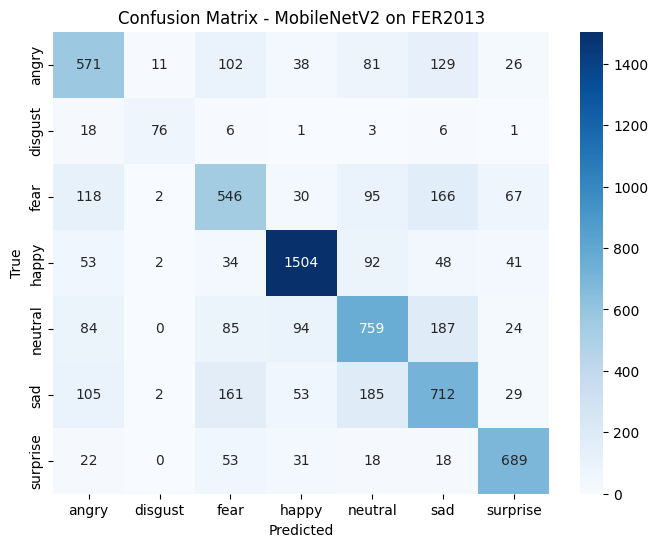

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ✅ 加载最佳模型
model.load_state_dict(torch.load('/content/drive/MyDrive/mobilenetv2_best.pth'))
model.eval()

# ✅ 收集预测与标签
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ✅ 计算四个指标
acc = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print("✅ Final Evaluation on Test Set:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ✅ 分类报告
print("\n📊 Classification Report:")
class_names = train_dataset.classes
print(classification_report(all_labels, all_preds, target_names=class_names))

# ✅ 混淆矩阵可视化
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MobileNetV2 on FER2013")

# ✅ 保存图像到 Google Drive
plt.savefig('/content/drive/MyDrive/mobilenetv2_confusion_matrix.png')
plt.show()


**不包含数据均衡**

In [ ]:
# ✅ Step 1: 挂载 Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Step 2: 导入库
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import os
import shutil

# ✅ Step 3: 设置参数
BATCH_SIZE = 64
EPOCHS = 50
PATIENCE = 7
LR = 1e-4
NUM_CLASSES = 7
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Step 4: 数据路径
train_path = '/content/drive/MyDrive/dataset/train'
test_path = '/content/drive/MyDrive/dataset/test'

# ✅ Step 5: 数据增强（保持）
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ✅ Step 6: 加载数据（不使用采样器和权重）
train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ✅ Step 7: 加载 MobileNetV2 模型
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)
model.classifier[1] = nn.Linear(model.last_channel, NUM_CLASSES)
model = model.to(device)

# ✅ Step 8: 损失函数 + 优化器 + 学习率调度器（不带权重）
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=5e-4, steps_per_epoch=len(train_loader), epochs=EPOCHS
)

# ✅ Step 9: EarlyStopping 设置
best_loss = float('inf')
patience_counter = 0

# ✅ Step 10: 训练主循环
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    all_preds, all_labels = [], []

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        epoch_loss += loss.item()
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        acc = accuracy_score(all_labels, all_preds)
        loop.set_postfix(loss=loss.item(), acc=acc)

    train_acc = accuracy_score(all_labels, all_preds)
    print(f"✅ Epoch {epoch+1}: Loss={epoch_loss:.4f}, Train Acc={train_acc:.4f}")

    # 保存最佳模型
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'mobilenetv2_best.pth')
        shutil.copy('mobilenetv2_best.pth', '/content/drive/MyDrive/mobilenetv2_best.pth')
        print("✅ Best model saved to Drive.")
    else:
        patience_counter += 1
        print(f"⚠️ EarlyStopping counter: {patience_counter}/{PATIENCE}")
        if patience_counter >= PATIENCE:
            print("⛔ Early stopping triggered.")
            break


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 75.7MB/s]
Epoch 1/50: 100%|██████████| 452/452 [1:36:23<00:00, 12.80s/it, acc=0.288, loss=1.59]


✅ Epoch 1: Loss=797.4171, Train Acc=0.2882
✅ Best model saved to Drive.


Epoch 2/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.454, loss=1.16]


✅ Epoch 2: Loss=645.4153, Train Acc=0.4544
✅ Best model saved to Drive.


Epoch 3/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.528, loss=1.2]


✅ Epoch 3: Loss=558.7512, Train Acc=0.5280
✅ Best model saved to Drive.


Epoch 4/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.577, loss=1.18]


✅ Epoch 4: Loss=503.0704, Train Acc=0.5769
✅ Best model saved to Drive.


Epoch 5/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.616, loss=0.766]


✅ Epoch 5: Loss=460.8641, Train Acc=0.6164
✅ Best model saved to Drive.


Epoch 6/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.642, loss=0.745]


✅ Epoch 6: Loss=429.5339, Train Acc=0.6424
✅ Best model saved to Drive.


Epoch 7/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.662, loss=0.99]


✅ Epoch 7: Loss=406.8523, Train Acc=0.6623
✅ Best model saved to Drive.


Epoch 8/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.681, loss=0.742]


✅ Epoch 8: Loss=385.4850, Train Acc=0.6808
✅ Best model saved to Drive.


Epoch 9/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.692, loss=0.956]


✅ Epoch 9: Loss=369.5287, Train Acc=0.6922
✅ Best model saved to Drive.


Epoch 10/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.708, loss=0.706]


✅ Epoch 10: Loss=351.8395, Train Acc=0.7081
✅ Best model saved to Drive.


Epoch 11/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.725, loss=0.824]


✅ Epoch 11: Loss=336.1850, Train Acc=0.7255
✅ Best model saved to Drive.


Epoch 12/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.732, loss=0.683]


✅ Epoch 12: Loss=325.3434, Train Acc=0.7322
✅ Best model saved to Drive.


Epoch 13/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.745, loss=0.843]


✅ Epoch 13: Loss=309.7781, Train Acc=0.7452
✅ Best model saved to Drive.


Epoch 14/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.763, loss=0.342]


✅ Epoch 14: Loss=291.1661, Train Acc=0.7634
✅ Best model saved to Drive.


Epoch 15/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.773, loss=0.794]


✅ Epoch 15: Loss=278.4220, Train Acc=0.7725
✅ Best model saved to Drive.


Epoch 16/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.787, loss=0.665]


✅ Epoch 16: Loss=258.0464, Train Acc=0.7868
✅ Best model saved to Drive.


Epoch 17/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.804, loss=0.538]


✅ Epoch 17: Loss=241.7322, Train Acc=0.8044
✅ Best model saved to Drive.


Epoch 18/50: 100%|██████████| 452/452 [04:01<00:00,  1.88it/s, acc=0.82, loss=0.423]


✅ Epoch 18: Loss=221.5942, Train Acc=0.8198
✅ Best model saved to Drive.


Epoch 19/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.828, loss=0.491]


✅ Epoch 19: Loss=209.8091, Train Acc=0.8278
✅ Best model saved to Drive.


Epoch 20/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.845, loss=0.284]


✅ Epoch 20: Loss=189.3073, Train Acc=0.8446
✅ Best model saved to Drive.


Epoch 21/50: 100%|██████████| 452/452 [04:07<00:00,  1.83it/s, acc=0.86, loss=0.542]


✅ Epoch 21: Loss=172.2572, Train Acc=0.8601
✅ Best model saved to Drive.


Epoch 22/50: 100%|██████████| 452/452 [04:05<00:00,  1.84it/s, acc=0.871, loss=0.328]


✅ Epoch 22: Loss=159.8098, Train Acc=0.8711
✅ Best model saved to Drive.


Epoch 23/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.884, loss=0.408]


✅ Epoch 23: Loss=144.4971, Train Acc=0.8840
✅ Best model saved to Drive.


Epoch 24/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.893, loss=0.446]


✅ Epoch 24: Loss=131.7474, Train Acc=0.8932
✅ Best model saved to Drive.


Epoch 25/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.907, loss=0.233]


✅ Epoch 25: Loss=118.1626, Train Acc=0.9073
✅ Best model saved to Drive.


Epoch 26/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.914, loss=0.236]


✅ Epoch 26: Loss=108.0581, Train Acc=0.9140
✅ Best model saved to Drive.


Epoch 27/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.923, loss=0.194]


✅ Epoch 27: Loss=94.8133, Train Acc=0.9234
✅ Best model saved to Drive.


Epoch 28/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.936, loss=0.179]


✅ Epoch 28: Loss=81.4403, Train Acc=0.9358
✅ Best model saved to Drive.


Epoch 29/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.937, loss=0.204]


✅ Epoch 29: Loss=78.3239, Train Acc=0.9373
✅ Best model saved to Drive.


Epoch 30/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.947, loss=0.193]


✅ Epoch 30: Loss=68.2525, Train Acc=0.9468
✅ Best model saved to Drive.


Epoch 31/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.953, loss=0.218]


✅ Epoch 31: Loss=60.9624, Train Acc=0.9525
✅ Best model saved to Drive.


Epoch 32/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.959, loss=0.0979]


✅ Epoch 32: Loss=52.6749, Train Acc=0.9587
✅ Best model saved to Drive.


Epoch 33/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.965, loss=0.145]


✅ Epoch 33: Loss=45.5014, Train Acc=0.9653
✅ Best model saved to Drive.


Epoch 34/50: 100%|██████████| 452/452 [04:02<00:00,  1.87it/s, acc=0.97, loss=0.108]


✅ Epoch 34: Loss=40.8444, Train Acc=0.9702
✅ Best model saved to Drive.


Epoch 35/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.975, loss=0.077]


✅ Epoch 35: Loss=33.6630, Train Acc=0.9747
✅ Best model saved to Drive.


Epoch 36/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.977, loss=0.155]


✅ Epoch 36: Loss=30.7980, Train Acc=0.9769
✅ Best model saved to Drive.


Epoch 37/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.978, loss=0.14]


✅ Epoch 37: Loss=29.1547, Train Acc=0.9781
✅ Best model saved to Drive.


Epoch 38/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.982, loss=0.034]


✅ Epoch 38: Loss=24.4386, Train Acc=0.9816
✅ Best model saved to Drive.


Epoch 39/50: 100%|██████████| 452/452 [04:01<00:00,  1.88it/s, acc=0.985, loss=0.054]


✅ Epoch 39: Loss=19.6239, Train Acc=0.9848
✅ Best model saved to Drive.


Epoch 40/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.985, loss=0.000883]


✅ Epoch 40: Loss=19.7830, Train Acc=0.9850
⚠️ EarlyStopping counter: 1/7


Epoch 41/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.988, loss=0.00927]


✅ Epoch 41: Loss=16.1806, Train Acc=0.9881
✅ Best model saved to Drive.


Epoch 42/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.99, loss=0.0341]


✅ Epoch 42: Loss=13.9196, Train Acc=0.9895
✅ Best model saved to Drive.


Epoch 43/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.991, loss=0.00278]


✅ Epoch 43: Loss=11.8746, Train Acc=0.9909
✅ Best model saved to Drive.


Epoch 44/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.992, loss=0.0136]


✅ Epoch 44: Loss=10.6783, Train Acc=0.9921
✅ Best model saved to Drive.


Epoch 45/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.993, loss=0.0374]


✅ Epoch 45: Loss=9.8132, Train Acc=0.9928
✅ Best model saved to Drive.


Epoch 46/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.993, loss=0.00503]


✅ Epoch 46: Loss=9.3265, Train Acc=0.9927
✅ Best model saved to Drive.


Epoch 47/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.994, loss=0.00321]


✅ Epoch 47: Loss=8.0926, Train Acc=0.9941
✅ Best model saved to Drive.


Epoch 48/50: 100%|██████████| 452/452 [04:01<00:00,  1.87it/s, acc=0.994, loss=0.0217]


✅ Epoch 48: Loss=8.3369, Train Acc=0.9937
⚠️ EarlyStopping counter: 1/7


Epoch 49/50: 100%|██████████| 452/452 [04:01<00:00,  1.88it/s, acc=0.994, loss=0.00351]


✅ Epoch 49: Loss=8.4233, Train Acc=0.9936
⚠️ EarlyStopping counter: 2/7


Epoch 50/50: 100%|██████████| 452/452 [04:00<00:00,  1.88it/s, acc=0.994, loss=0.0031]

✅ Epoch 50: Loss=7.8849, Train Acc=0.9944
✅ Best model saved to Drive.


Evaluating on test set: 100%|██████████| 113/113 [00:52<00:00,  2.15it/s]


📊 Classification Report:
              precision    recall  f1-score   support

       angry     0.6279    0.6148    0.6213       958
     disgust     0.8065    0.6757    0.7353       111
        fear     0.5909    0.5049    0.5445      1024
       happy     0.8735    0.8833    0.8784      1774
     neutral     0.6187    0.6829    0.6492      1233
         sad     0.5507    0.5613    0.5560      1247
    surprise     0.8121    0.8267    0.8193       831

    accuracy                         0.6934      7178
   macro avg     0.6972    0.6785    0.6863      7178
weighted avg     0.6924    0.6934    0.6920      7178



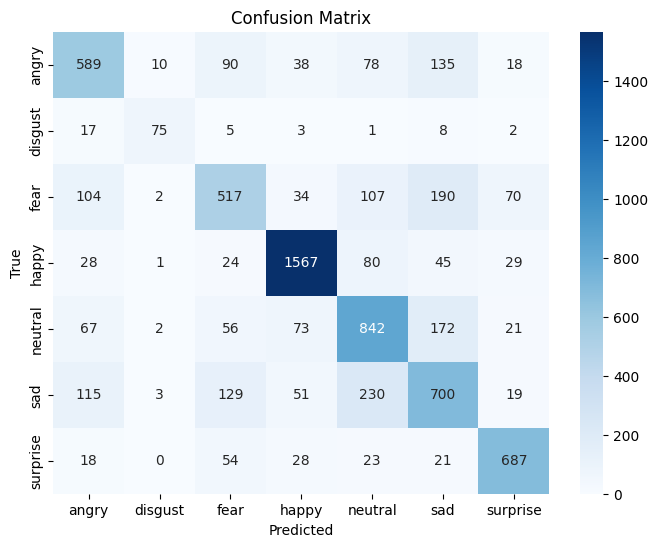

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ✅ 加载保存的最佳模型
model.load_state_dict(torch.load('/content/drive/MyDrive/mobilenetv2_best.pth'))
model.eval()

# ✅ 收集所有预测与真实标签
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Evaluating on test set"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ✅ 计算四个指标
print("📊 Classification Report:")
target_names = test_dataset.classes  # 类别名称
report = classification_report(all_labels, all_preds, target_names=target_names, digits=4)
print(report)

# ✅ 混淆矩阵
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Evaluating on train set: 100%|██████████| 452/452 [02:54<00:00,  2.59it/s]


📊 Train Set Classification Report:
              precision    recall  f1-score   support

       angry     0.9942    0.9959    0.9950      4125
     disgust     0.9954    0.9931    0.9943       436
        fear     0.9930    0.9899    0.9914      4147
       happy     0.9999    0.9993    0.9996      7222
     neutral     0.9962    0.9986    0.9974      4985
         sad     0.9954    0.9950    0.9952      4830
    surprise     0.9940    0.9943    0.9942      3171

    accuracy                         0.9960     28916
   macro avg     0.9954    0.9952    0.9953     28916
weighted avg     0.9960    0.9960    0.9960     28916



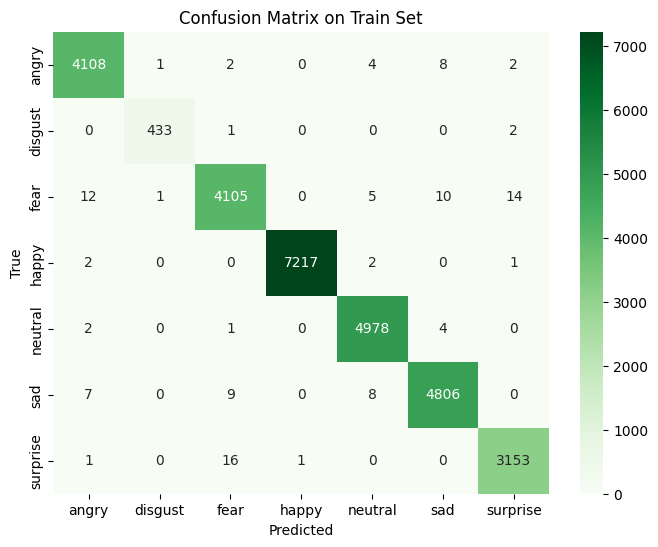

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 设置模型为评估模式
model.eval()

# ✅ 收集训练集上的预测与标签
train_preds = []
train_labels = []

with torch.no_grad():
    for images, labels in tqdm(train_loader, desc="Evaluating on train set"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(1)

        train_preds.extend(preds.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

# ✅ 输出四个指标
print("📊 Train Set Classification Report:")
print(classification_report(train_labels, train_preds, target_names=train_dataset.classes, digits=4))

# ✅ 绘制训练集混淆矩阵
train_cm = confusion_matrix(train_labels, train_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix on Train Set")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision (macro): {precision:.4f}")
print(f"✅ Recall (macro): {recall:.4f}")
print(f"✅ F1-score (macro): {f1:.4f}")


✅ Accuracy: 0.6934
✅ Precision (macro): 0.6972
✅ Recall (macro): 0.6785
✅ F1-score (macro): 0.6863
